# Find clusters for the included dataset.

The solution must be produced as a Python Notebook.\
The notebook must include appropriate comments and must operate as follows:
1. load the data and separate in X all the columns but the last one, in y the last column, then produce
a pairplot of X and decide which pair of columns is most interesting for a 2d scatterplot, ad produce
the scatterplot (5pt)
2. find the best clustering scheme for X with a method of your choice, plot ssd and global silhouhette
index for an appropriate range of parameters and show the chosen hyperparameter(s) (5pt)
    1. consider carefully the number of clusters, simple optimisation of the silhouette will not be
enough, consider also the elbow plot and decide visually the best number of clusters
3. fit the clustering scheme to y_km, then produce the confusion matrix comparing y and y_km with
sklearn.metrics.confusion_matrix, the resulting confusion matrix must be "sorted" using the
function max_diag provided below, producing the final confusion matrix cm_km (5pt)
4. in a comment explain why function max_diag is useful (2pt)
5. compute the accuracy a_km of y_km versus y as the ratio the sum of the main diagonal of cm_km
and the number of samples in X (2pt)
6. rescale X using sklearn.preprocessing.MinMaxScaler, producing the scaled dataset X_mms (3pt)
7. repeat point 3 and 5 above, fitting X_mms to y_km_mms and producing the confusion matrix
cm_km_mms reordered with max_diag and the accuracy a_km_mms as above (3pt)

Quality of the code (6pt):
1. The python cells must be preceded by appropriate comments
2. Useless cells and pieces of code will be penalised
3. Naming style of variables must be uniform and in English
4. Bad indentation and messy code will be penalised

### 0. Useful stuff (imports, variables, etc)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

random_state = 76
target = 7

### 1. load the data and separate in X all the columns but the last one, in y the last column, then produce a pairplot of X and decide which pair of columns is most interesting for a 2d scatterplot, ad produce the scatterplot (5pt)

we start by reading the dataset with pandas, setting **y** as the last column and putting the rest into **X**

In [37]:
df = pd.read_csv('./seeds_dataset.txt', delimiter="\t", header=None)

y = df[target]
X = df.drop(columns=[target])

In [38]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 7, dtype: int64

In [39]:
print(f"there are {np.unique(y).shape[0]} unique classes in the dataset")

there are 3 unique classes in the dataset


In [40]:
X.head()

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


using seaborn we can proceed on creating a pairplot to analyze the data and decide how to proceed for the scatterplot

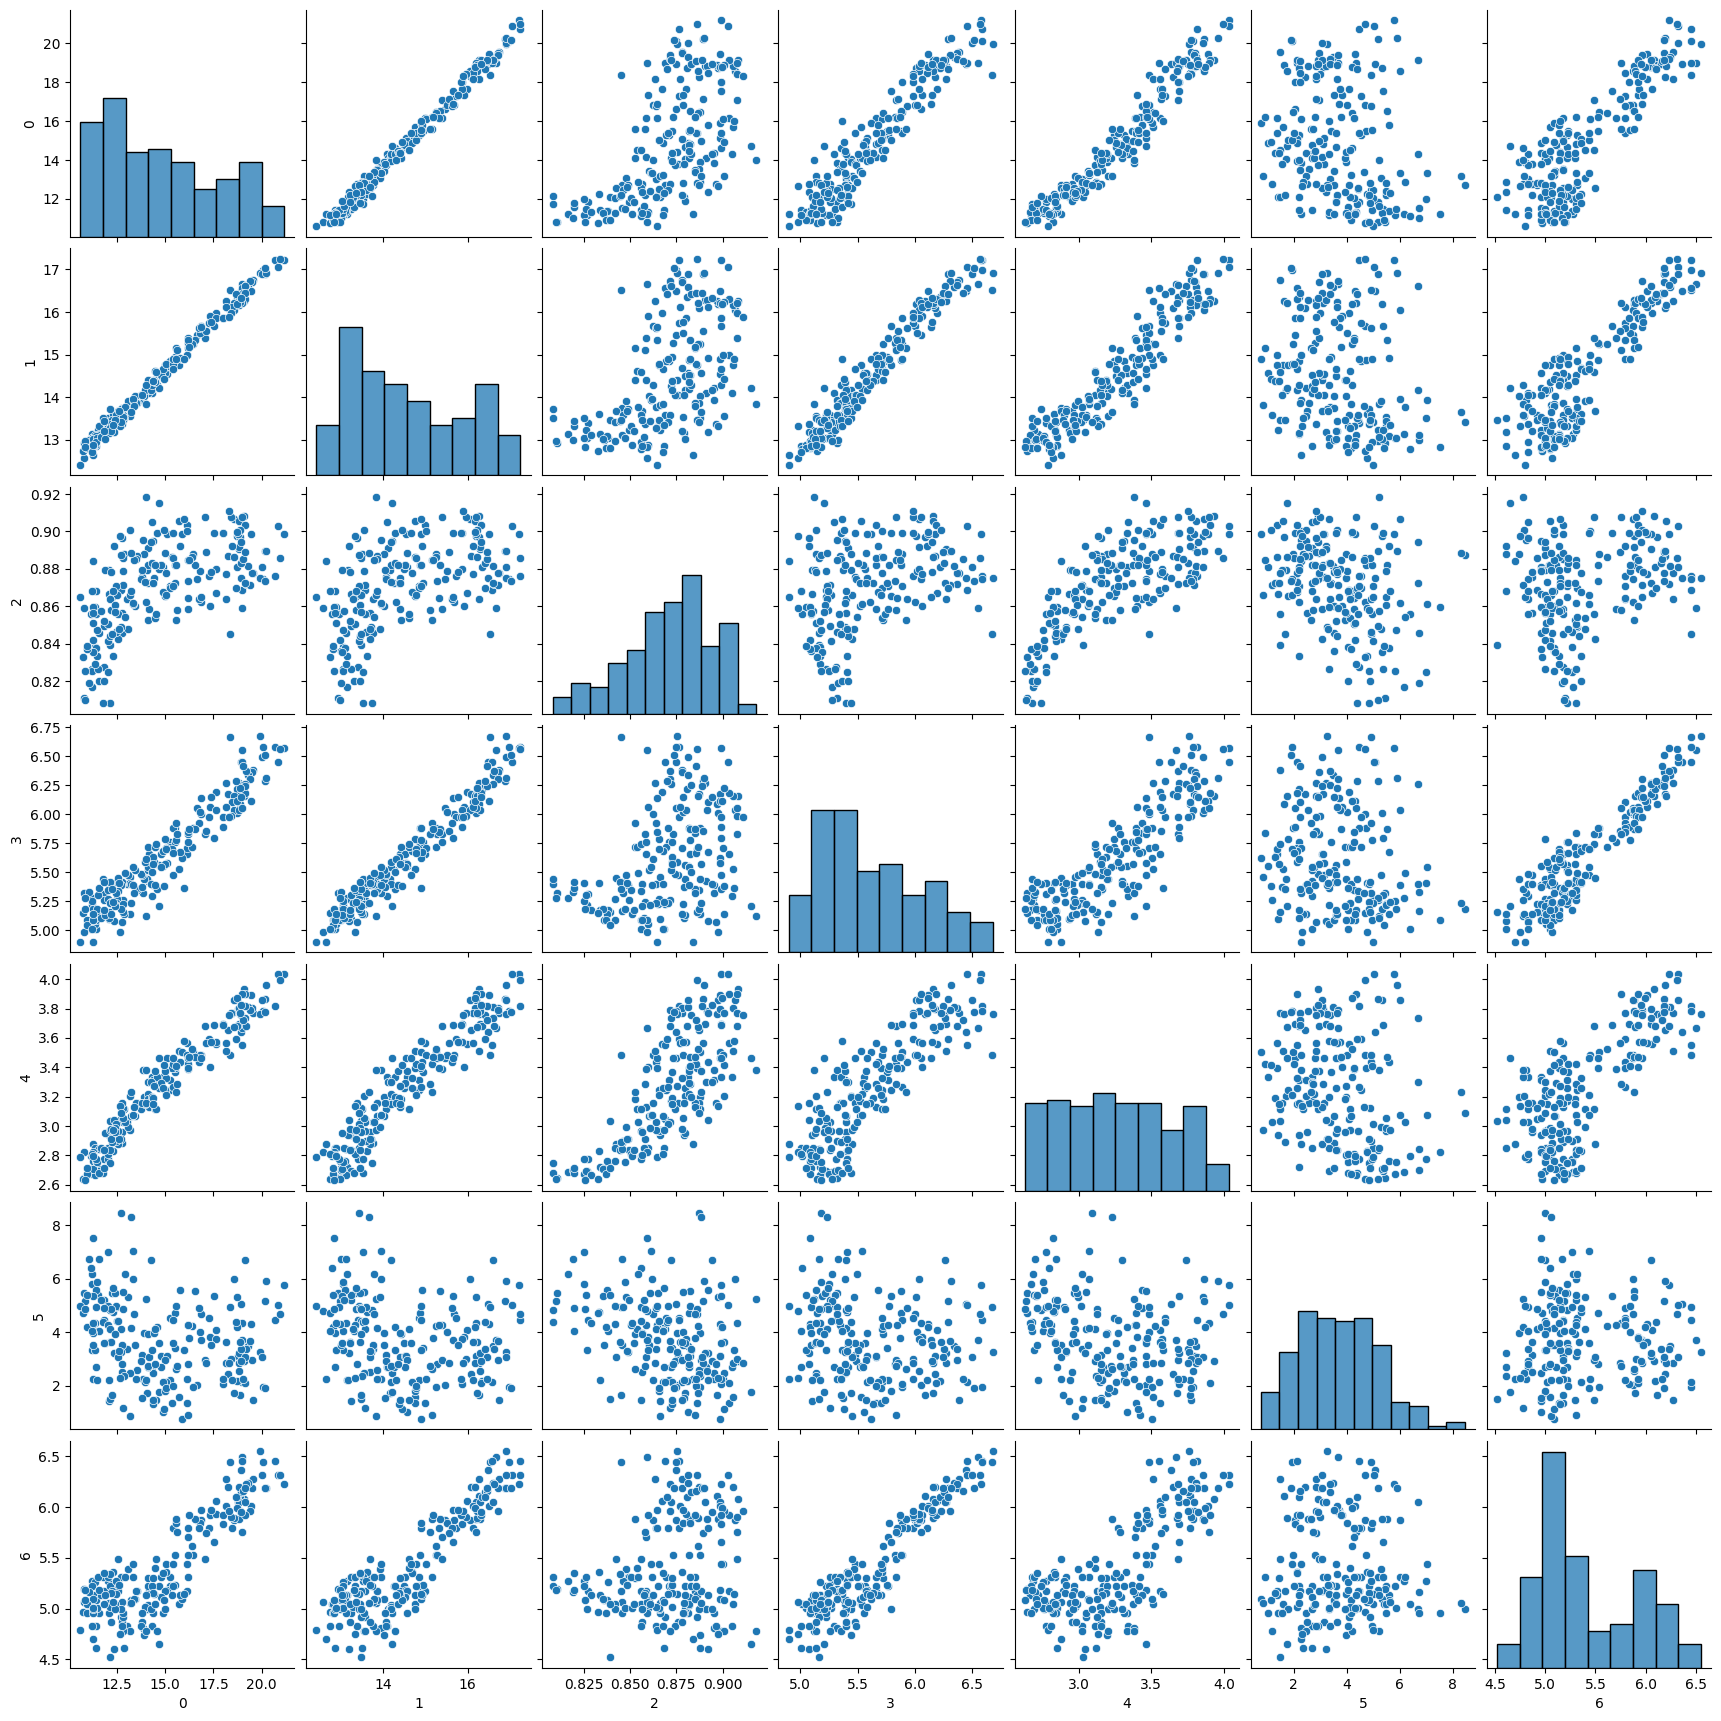

In [41]:
sns.pairplot(X)

Judging by the pairplots, we choose the columns with indexes 3,6, as they seem to create three
distinct clusters, one for each of the classes that we have. We will plot a scatterplot using those
two columns.

<Axes: xlabel='3', ylabel='6'>

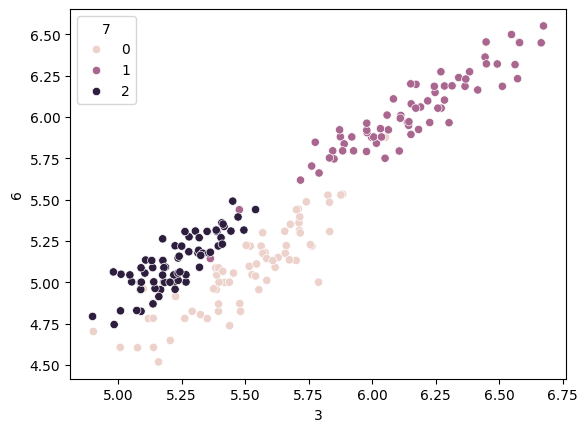

In [45]:
focus = (3, 6)

sns.scatterplot(x=focus[0], y=focus[1], data=df, hue=target)

### 2. find the best clustering scheme for X with a method of your choice, plot ssd and global silhouhette index for an appropriate range of parameters and show the chosen hyperparameter(s) (5pt)

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
rrange = range(2, 11)

for k in rrange:
    km = KMeans(n_clusters=k, random_state=random_state)

    y_km = km.fit_predict(X)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(X, y_km))

    print(f"k={k}, inertia={inertia[k-2]}, silhouette={silhouette[k-2]}")

k=2, inertia=1011.8604132841181, silhouette=0.5253981519704324
k=3, inertia=587.3186115940427, silhouette=0.4719337319126893
k=4, inertia=475.5837286843439, silhouette=0.3961091533039387
k=5, inertia=402.56140017523717, silhouette=0.3769683084042789
k=6, inertia=343.9907739507813, silhouette=0.3313658423598504
k=7, inertia=313.42299650876055, silhouette=0.2988515968132978
k=8, inertia=261.7154695140322, silhouette=0.3229231707945039
k=9, inertia=241.0977583021367, silhouette=0.31857400375687644
k=10, inertia=210.66221107930517, silhouette=0.3313833628174105


let's plot the inertia (distortion) and silhouette score indexes to decide which k is best

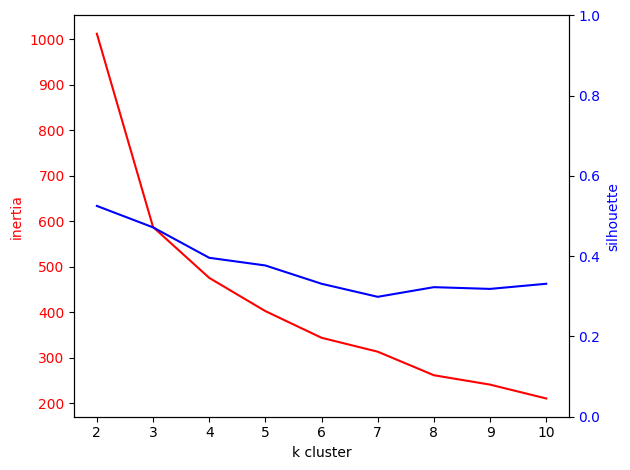

In [68]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("k cluster")

# inertia
ax1.set_ylabel('inertia', color='red')
ax1.plot(rrange, inertia, color='red')
ax1.tick_params(axis='y', labelcolor='red')

# silhouette

ax2 = ax1.twinx()

ax2.set_ylabel('silhouette', color='blue')
ax2.plot(rrange, silhouette, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(0, 1)

fig.tight_layout()
plt.show()

the plot suggests that the best k is **2** or 3, since the inertia as the maximum slope (signaling best coupling of points in the clusters) and silhouette is at the maximum (signaling better distinction between clusters)

In [69]:
best_k_for_silhouette = 2

### 3. consider carefully the number of clusters, simple optimisation of the silhouette will not be enough, consider also the elbow plot and decide visually the best number of clusters

The elbow plot seems to suggest that there should be 3 clusters instead of 2. We will plot both clustering schemes and choose visually

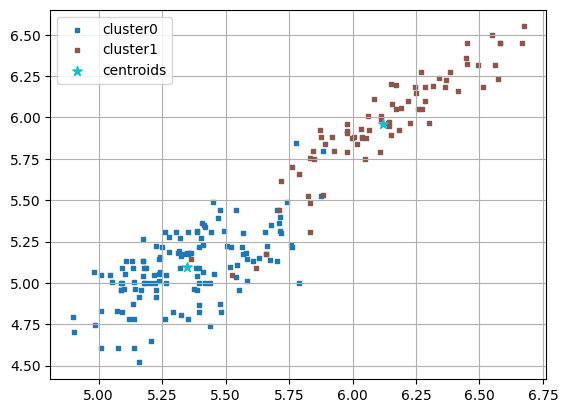

In [83]:
from plot_clusters import plot_clusters

km = KMeans(n_clusters=best_k_for_silhouette, random_state=random_state)
y_km = km.fit_predict(X)
plot_clusters(X.to_numpy(), y_km, dim=focus, points=km.cluster_centers_)

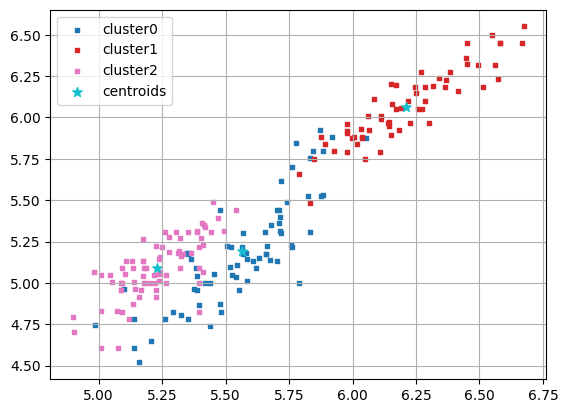

In [86]:
elbow_best_k = 3

km = KMeans(n_clusters=elbow_best_k, random_state=random_state)
y_km = km.fit_predict(X)
plot_clusters(X.to_numpy(), y_km, dim=focus, points=km.cluster_centers_)

it seems that k=3 better represents the data for the focused features

In [88]:
best_k = 3

### 3. fit the clustering scheme to y_km, then produce the confusion matrix comparing y and y_km with sklearn.metrics.confusion_matrix, the resulting confusion matrix must be "sorted" using the function max_diag provided below, producing the final confusion matrix cm_km (5pt)

let's prepare the clustering scheme with the best found k

In [100]:
from sklearn.metrics import confusion_matrix

km = KMeans(n_clusters=best_k, random_state=random_state)

y_km = km.fit_predict(X)

km.fit(X, y=y_km)

KMeans(n_clusters=3, random_state=76)

In [101]:
cm = confusion_matrix(y, y_km)

print(cm)

[[60  1  9]
 [10 60  0]
 [ 2  0 68]]


let's have a look at max_diag helper function

In [103]:
from max_diag import max_diag

help(max_diag)

Help on function max_diag in module max_diag:

max_diag(sq_arr)
    Given a square matrix produces another squared matrix with the same contents,
    but the columns are re-orered in order to have the highest values in the main diagonal
    Parameter: sq_arr - a squared matrix
    Example:
    In [1]: import numpy as np
            max_diag(np.array([[1,10],[20,2]]))
    Out[1]: array([[10.,  1.],
                   [ 2., 20.]])
    This function is useful to reorder a confusion matrix when the two label vectors
    have different codings



In [107]:
cm_km = max_diag(cm)

cm_km

array([[60.,  1.,  9.],
       [10., 60.,  0.],
       [ 2.,  0., 68.]])

### 4. in a comment explain why function max_diag is useful (2pt)

the function is useful to reorder a confusion matrix when the label groups have two different codings

### 5. compute the accuracy a_km of y_km versus y as the ratio the sum of the main diagonal of cm_km and the number of samples in X (2pt)

In [112]:
a_km = np.diagonal(cm_km).sum() / X.shape[0]

print(f"the accuracy of a_km vs y is {a_km*100:.2f}%")

the accuracy of a_km vs y is 89.52%


### 6. rescale X using sklearn.preprocessing.MinMaxScaler, producing the scaled dataset X_mms (3pt)

let's scale X using MinMax which scales the ranges in [0, 1] (or [-1, 1])

In [117]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_mms = scaler.fit_transform(X)

print(X_mms)

[[0.44098206 0.50206612 0.5707804  ... 0.48610121 0.18930164 0.34515017]
 [0.40509915 0.44628099 0.66243194 ... 0.50106914 0.03288302 0.21516494]
 [0.34938621 0.34710744 0.87931034 ... 0.50392017 0.25145302 0.1506647 ]
 ...
 [0.24645892 0.25826446 0.7277677  ... 0.42908054 0.98166664 0.26440177]
 [0.11803588 0.16528926 0.39927405 ... 0.14682823 0.36834441 0.25849335]
 [0.16147309 0.19214876 0.54718693 ... 0.24518888 0.63346292 0.26784835]]


### 7. repeat point 3 and 5 above, fitting X_mms to y_km_mms and producing the confusion matrix cm_km_mms reordered with max_diag and the accuracy a_km_mms as above (3pt)

let's repeat point 3 (clustering with best_k) and 5 (compute the accuracy of y_km vs y) with X_mms

In [118]:
y_km_mms = km.fit_predict(X_mms)

km.fit(X_mms, y=y_km_mms)

cm_km_mms = max_diag(confusion_matrix(y, y_km_mms))
a_km_mms = np.diagonal(cm_km_mms).sum() / X_mms.shape[0]

print(f"the accuracy of a_km_mms vs y_km_mms is {a_km*100:.2f}%")

the accuracy of a_km_mms vs y_km_mms is 89.52%
